In [21]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (14, 6)
mpl.rcParams['axes.grid'] = False

In [4]:
# zip_path = tf.keras.utils.get_file(
#     origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
#     fname='jena_climate_2009_2016.csv.zip',
#     extract=True)
# csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 3s 0us/step


In [180]:
df = pd.read_csv(csv_path)

In [160]:
#df.columns

In [154]:
csv_path

'/Users/tarekatwan/.keras/datasets/jena_climate_2009_2016.csv'

In [184]:
#df.to_csv('jena_climate_2009_2016.csv.zip', compression='infer', index=None)
# path = 'jena_climate_2009_2016.csv.zip'

In [186]:
df = pd.read_csv(path, index_col='DateTime', parse_dates=True, infer_datetime_format=True)

In [185]:
# titles = [
#     "DateTime",
#     "Pressure",
#     "Temperature",
#     "Temperature in Kelvin",
#     "Temperature (dew point)",
#     "Relative Humidity",
#     "Saturation vapor pressure",
#     "Vapor pressure",
#     "Vapor pressure deficit",
#     "Specific humidity",
#     "Water vapor concentration",
#     "Air Density",
#     "Wind speed",
#     "Maximum wind speed",
#     "Wind direction in degrees",
# ]
# df.columns = titles

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420551 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Pressure                   420551 non-null  float64
 1   Temperature                420551 non-null  float64
 2   Temperature in Kelvin      420551 non-null  float64
 3   Temperature (dew point)    420551 non-null  float64
 4   Relative Humidity          420551 non-null  float64
 5   Saturation vapor pressure  420551 non-null  float64
 6   Vapor pressure             420551 non-null  float64
 7   Vapor pressure deficit     420551 non-null  float64
 8   Specific humidity          420551 non-null  float64
 9   Water vapor concentration  420551 non-null  float64
 10  Air Density                420551 non-null  float64
 11  Wind speed                 420551 non-null  float64
 12  Maximum wind speed         420551 non-null  float64


In [194]:
df.shape

(420551, 14)

In [172]:
df.index.year.unique()

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64', name='DateTime')

* rho air density (mass of air per unit volume (e.g. g/m3))
* mbar air pressue in millibar
* T is temperature in Celsius 

In [195]:
df = df.resample('D').last()

In [196]:
df

,Pressure,Temperature,Temperature in Kelvin,Temperature (dew point),Relative Humidity,Saturation vapor pressure,Vapor pressure,Vapor pressure deficit,Specific humidity,Water vapor concentration,Air Density,Wind speed,Maximum wind speed,Wind direction in degrees
DateTime,,,,,,,,,,,,,,
2009-01-01,999.67,-4.58,268.61,-5.62,92.40,4.34,4.01,0.33,2.50,4.02,1294.65,0.69,1.25,213.90
2009-01-02,982.74,-2.56,271.95,-4.33,87.60,5.06,4.43,0.63,2.81,4.51,1263.00,3.22,4.63,37.45
2009-01-03,984.21,3.42,277.84,1.96,90.10,7.81,7.04,0.77,4.46,7.15,1236.28,2.50,4.00,177.20
2009-01-04,994.50,8.21,281.81,1.09,60.68,10.89,6.61,4.28,4.14,6.65,1228.19,4.60,6.25,10.93
2009-01-05,996.09,10.47,283.95,9.18,91.70,12.69,11.63,1.05,7.30,11.68,1218.02,0.08,0.75,153.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,1015.17,3.53,275.51,2.04,89.90,7.87,7.08,0.80,4.35,6.97,1274.74,0.82,1.28,101.70
2016-12-29,1012.34,-1.85,270.36,-2.12,98.00,5.33,5.22,0.11,3.22,5.16,1297.30,1.88,2.64,222.60
2016-12-30,1008.67,-4.02,268.47,-5.21,91.40,4.53,4.14,0.39,2.56,4.11,1303.56,0.72,1.74,186.70


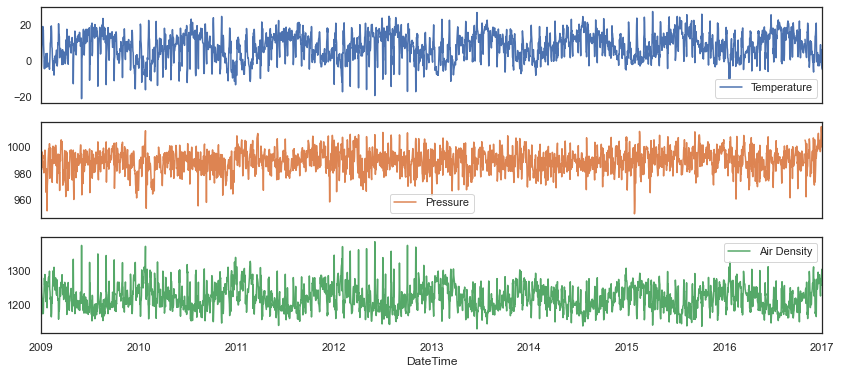

In [197]:
# Slice [start:stop:step], starting from index 5 take every 6th record.
#df = df.loc['2009':'2017'].copy()
# df = df[5::6]
plot_cols = ['Temperature', 'Pressure', 'Air Density']
plot_features = df[plot_cols]
# plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [198]:
df.index.month.value_counts()

1     249
3     248
5     248
7     248
8     248
10    248
12    248
4     240
6     240
9     240
11    240
2     226
Name: DateTime, dtype: int64

In [199]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pressure,2921.0,989.473300,8.325071,949.73,984.48,989.94,994.90,1015.17
Temperature,2921.0,7.958689,7.343412,-20.75,2.66,8.51,13.48,27.14
Temperature in Kelvin,2921.0,281.975330,7.431199,252.80,276.71,282.39,287.56,301.11
Temperature (dew point),2921.0,4.881582,6.716914,-22.61,0.10,5.20,9.92,21.37
Relative Humidity,2921.0,81.864173,11.350852,42.20,74.20,83.80,91.10,100.00
Saturation vapor pressure,2921.0,11.872961,5.578305,1.16,7.40,11.12,15.48,36.00
Vapor pressure,2921.0,9.480685,4.145173,0.98,6.15,8.85,12.23,25.49
Vapor pressure deficit,2921.0,2.392147,2.292369,0.00,0.73,1.62,3.34,19.15
Specific humidity,2921.0,5.986936,2.630355,0.62,3.89,5.58,7.73,16.27
Water vapor concentration,2921.0,9.583872,4.194434,0.99,6.25,8.94,12.36,25.90


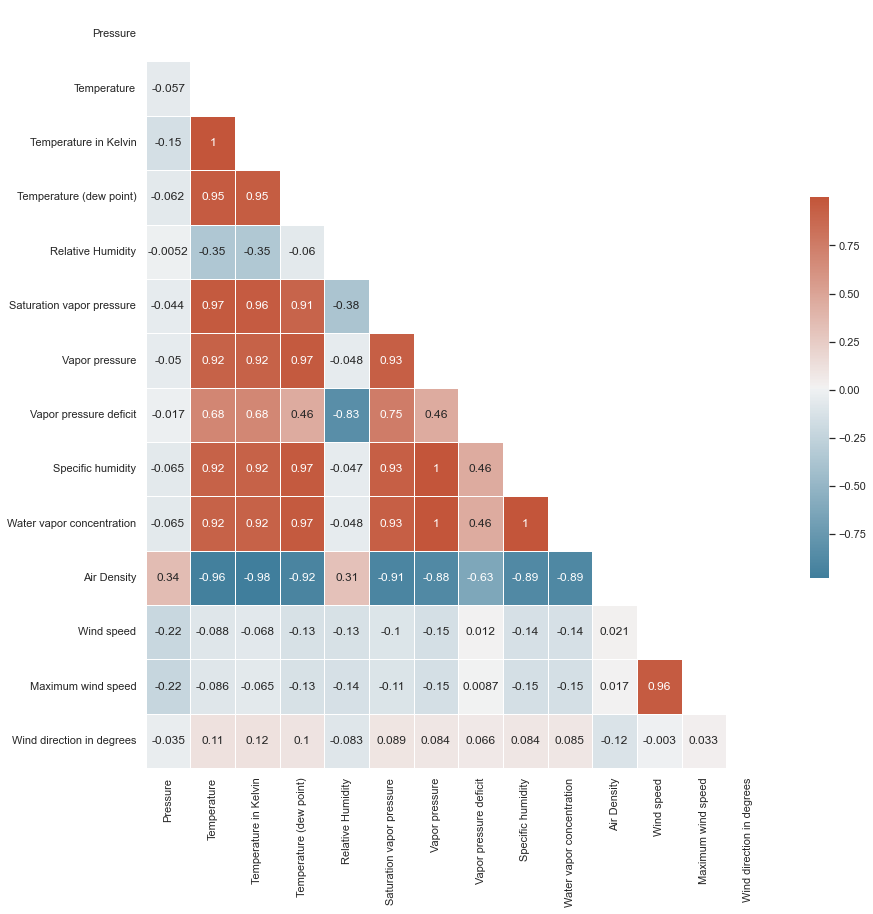

In [200]:
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(corr)

f, ax = plt.subplots(figsize=(14, 14))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, linewidths=.5, annot=True, cbar_kws={"shrink": .5}, cmap=cmap)
plt.show()

In [225]:
df.columns

Index(['Pressure', 'Temperature', 'Temperature in Kelvin',
       'Temperature (dew point)', 'Relative Humidity',
       'Saturation vapor pressure', 'Vapor pressure', 'Vapor pressure deficit',
       'Specific humidity', 'Water vapor concentration', 'Air Density',
       'Wind speed', 'Maximum wind speed', 'Wind direction in degrees'],
      dtype='object')

In [229]:
features = ['Pressure', 
       'Temperature',
       'Saturation vapor pressure',
       'Vapor pressure deficit',
       'Specific humidity',
      'Air Density',
      'Wind speed']

In [232]:
df_features = df[features]

In [233]:
df_features.shape

(2923, 7)

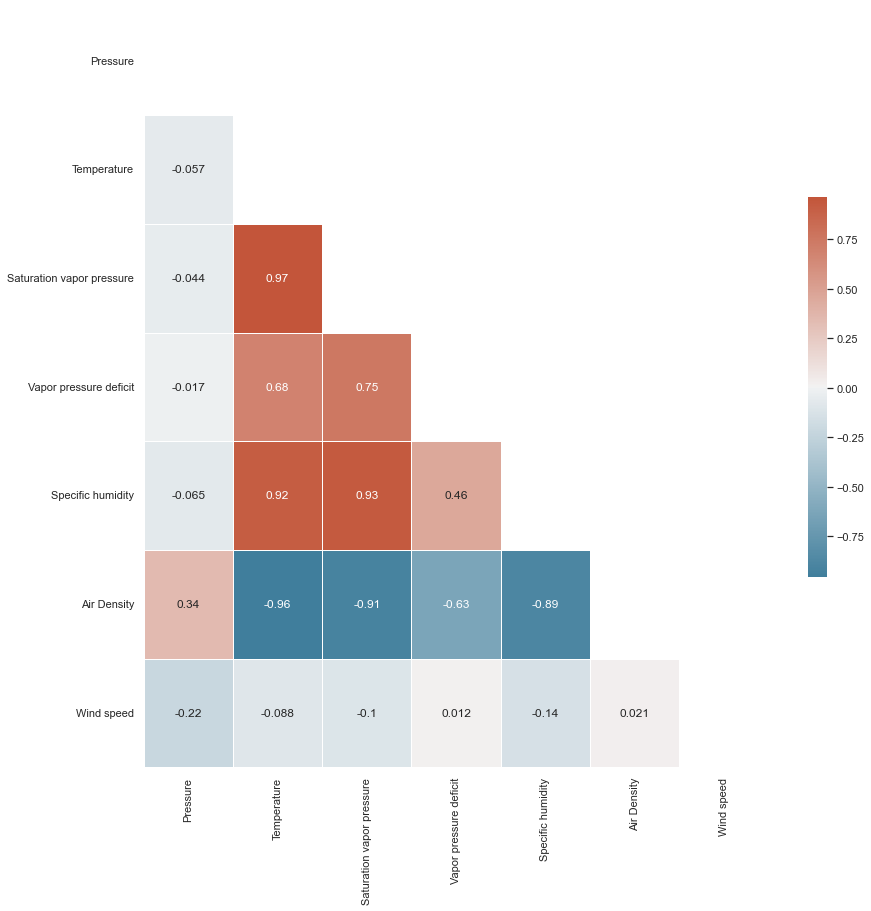

In [234]:
sns.set_theme(style="white")
corr = df_features.corr()
mask = np.triu(corr)

f, ax = plt.subplots(figsize=(14, 14))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, linewidths=.5, annot=True, cbar_kws={"shrink": .5}, cmap=cmap)
plt.show()

In [261]:
def split_data(df, split=0.80):
    split = 0.80
    train_split = int(split * df.shape[0])
    train = df[:train_split]
    test = df[train_split:]
    return train, test

In [262]:
def standardize(train, test):
    mu = train.mean()
    sigma = train.std()
    s_train = (train - mu)/sigma
    s_test = (test - mu)/sigma
    return s_train, s_test

In [263]:
train, test_set = split_data(df_features, split=0.80)

In [265]:
train_scaled, test_scaled = standardize(train, test_set)

In [266]:
train_scaled, val_scaled = split_data(train_scaled, split=0.80)

In [267]:
print(len(train_scaled))
print(len(test_scaled))
print(len(val_scaled))

1870
585
468


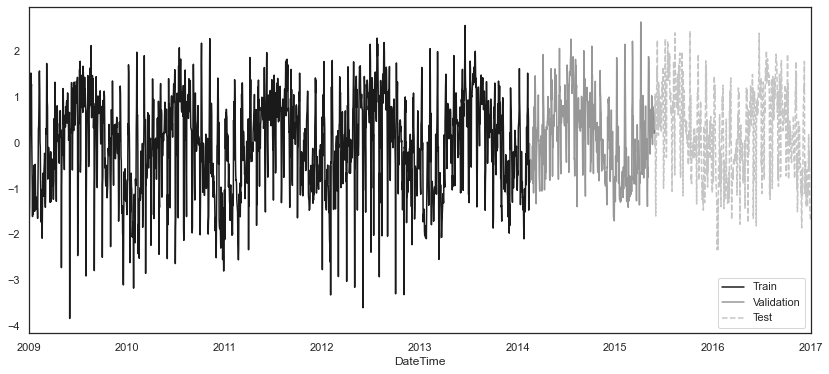

In [268]:
train_scaled['Temperature'].plot(style='k', label='Train')
val_scaled['Temperature'].plot(style='k',alpha=0.45, label='Validation')
test_scaled['Temperature'].plot(style='k--', alpha=0.25, label='Test')
plt.legend(); plt.show()

In [271]:
from tensorflow import keras
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

In [ ]:
dataset = timeseries_dataset_from_array()(

)

In [272]:
df = pd.read_csv(csv_path)

In [280]:
date_time_key = "Date Time"

In [273]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [274]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))

In [275]:
train_split

300693

In [278]:
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [281]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

The selected parameters are: DateTime, Pressure, Relative Humidity, Vapor pressure, Vapor pressure deficit, Water vapor concentration, Air Density


,p (mbar),T (degC),VPmax (mbar),VPdef (mbar),sh (g/kg),rho (g/m**3),wv (m/s)
Date Time,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,3.33,0.22,1.94,1307.75,1.03
01.01.2009 00:20:00,996.57,-8.41,3.23,0.21,1.89,1309.80,0.72
01.01.2009 00:30:00,996.53,-8.51,3.21,0.20,1.88,1310.24,0.19
01.01.2009 00:40:00,996.51,-8.31,3.26,0.19,1.92,1309.19,0.34
01.01.2009 00:50:00,996.51,-8.27,3.27,0.19,1.92,1309.00,0.32


In [282]:
features.shape

(420551, 7)

In [283]:
features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

,0,1,2,3,4,5,6
0,0.955451,-2.000020,-1.319782,-0.788479,-1.500927,2.237658,-0.732997
1,0.961528,-2.045185,-1.332806,-0.790561,-1.519521,2.287838,-0.936002
2,0.956666,-2.056766,-1.335410,-0.792642,-1.523239,2.298608,-1.283076
3,0.954236,-2.033604,-1.328898,-0.794724,-1.508364,2.272906,-1.184847
4,0.954236,-2.028972,-1.327596,-0.794724,-1.508364,2.268256,-1.197944


In [284]:
train_split

300693

In [285]:
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

In [289]:
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 256
epochs = 10

In [293]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

In [302]:
start

792

In [301]:
end

301485

In [303]:
sequence_length

120

In [305]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [309]:
dataset_train

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [310]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 120, 7)
Target shape: (256, 1)


In [311]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 lstm (LSTM)                 (None, 32)                5120      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [312]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1838
Epoch 1: val_loss improved from inf to 0.15035, saving model to model_checkpoint.h5
1172/1172 [==============================] - 108s 91ms/step - loss: 0.1838 - val_loss: 0.1503
Epoch 2/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1282
Epoch 2: val_loss improved from 0.15035 to 0.14486, saving model to model_checkpoint.h5
1172/1172 [==============================] - 106s 90ms/step - loss: 0.1282 - val_loss: 0.1449
Epoch 3/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1159
Epoch 3: val_loss did not improve from 0.14486
1172/1172 [==============================] - 107s 91ms/step - loss: 0.1159 - val_loss: 0.1496
Epoch 4/10
1172/1172 [==============================] - ETA: 0s - loss: 0.1104
Epoch 4: val_loss did not improve from 0.14486
1172/1172 [==============================] - 111s 94ms/step - loss: 0.1104 - val_loss: 0.1461
Epoch 5/10
1172/1172 [====================

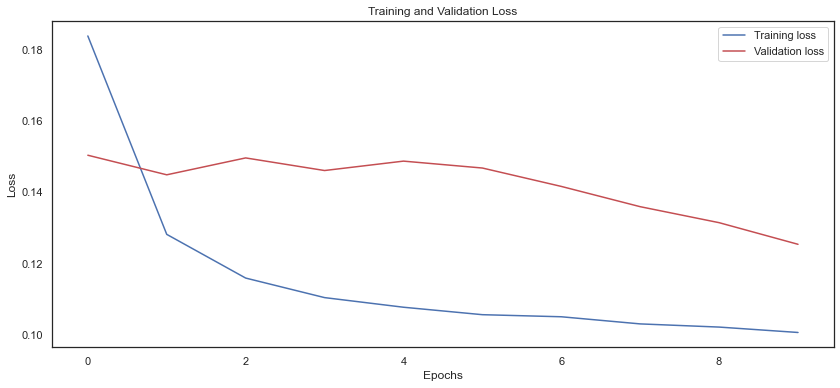

In [313]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

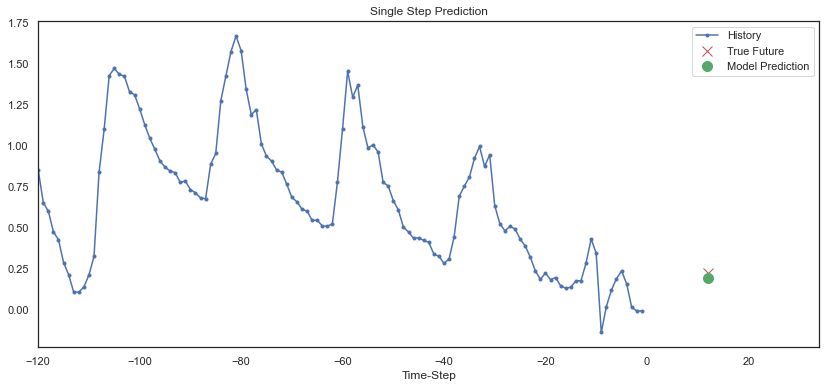

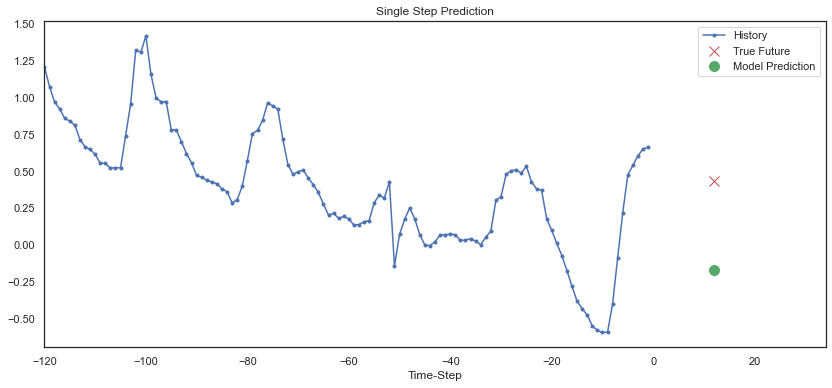

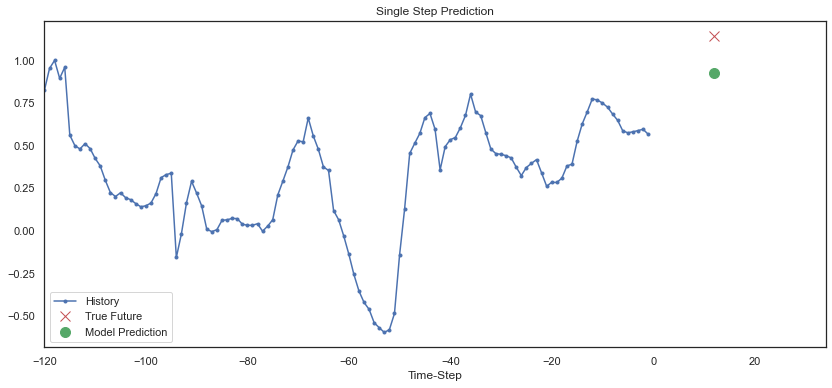

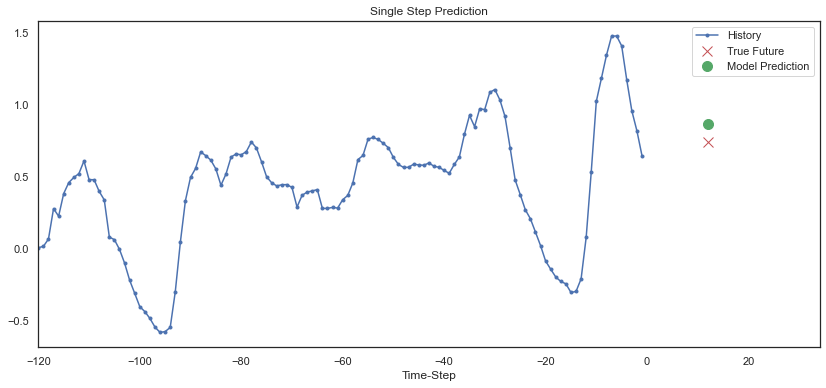

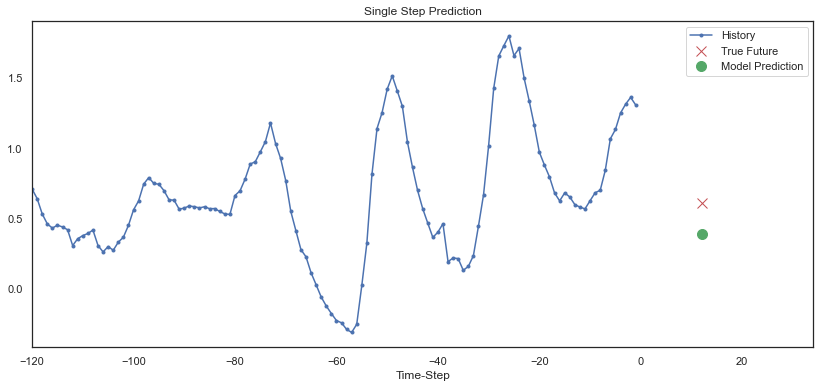

In [314]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

## New

<AxesSubplot:xlabel='Month'>

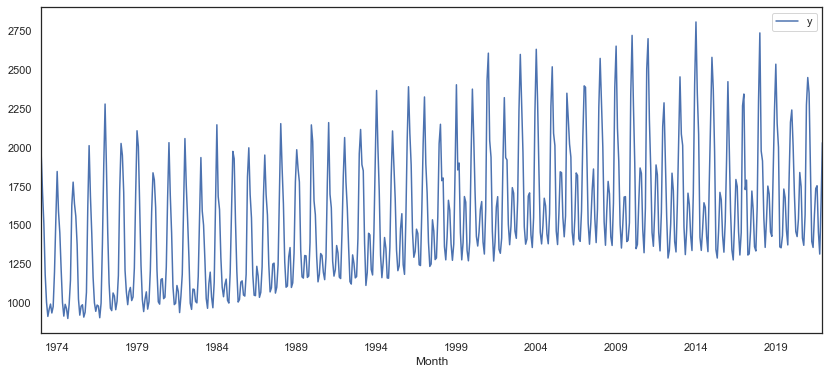

In [325]:
from pathlib import Path
file = Path('../../datasets/Ch12/Residential_Energy_Consumption.xlsx')
col = ['Month','Total Energy Consumed by the Residential Sector']
df = pd.read_excel(file, index_col='Month', usecols=col)
df.columns = ['y']
df.plot()

In [326]:
df.head()

,y
Month,
1973-01-01,1957.641
1973-02-01,1712.143
1973-03-01,1510.079
1973-04-01,1183.421
1973-05-01,1006.326


In [320]:
lags = 12

for i in range(1, lags+1):
    df[f'y_t-{i}'] = df['y'].shift(i)
    
df.dropna(inplace=True)
df.head()

,y,y_t-1,y_t-2,y_t-3,y_t-4,y_t-5,y_t-6,y_t-7,y_t-8,y_t-9,y_t-10,y_t-11,y_t-12
Month,,,,,,,,,,,,,
1974-01-01,1846.930,1538.568,1202.105,978.162,937.083,994.259,961.872,914.949,1006.326,1183.421,1510.079,1712.143,1957.641
1974-02-01,1589.448,1846.930,1538.568,1202.105,978.162,937.083,994.259,961.872,914.949,1006.326,1183.421,1510.079,1712.143
1974-03-01,1451.073,1589.448,1846.930,1538.568,1202.105,978.162,937.083,994.259,961.872,914.949,1006.326,1183.421,1510.079
1974-04-01,1215.228,1451.073,1589.448,1846.930,1538.568,1202.105,978.162,937.083,994.259,961.872,914.949,1006.326,1183.421
1974-05-01,1003.821,1215.228,1451.073,1589.448,1846.930,1538.568,1202.105,978.162,937.083,994.259,961.872,914.949,1006.326


In [321]:
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [330]:
df.head()

,y
Month,
1973-01-01,1957.641
1973-02-01,1712.143
1973-03-01,1510.079
1973-04-01,1183.421
1973-05-01,1006.326


In [328]:
X, y = split_sequence(df.values, n_steps)

In [332]:
for i in range(3):
    print(X[i], y[i])

[[1957.641]
 [1712.143]
 [1510.079]] [1183.421]
[[1712.143]
 [1510.079]
 [1183.421]] [1006.326]
[[1510.079]
 [1183.421]
 [1006.326]] [914.949]


In [334]:
y.shape

(585, 1)

In [336]:
X.shape

(585, 3, 1)

In [324]:
def wrap_data(df, lookback: int):
    dataset = []
    for index in range(lookback, len(df)+1):
        features = {
              f"col_{i}": float(val) for i, val in enumerate(
             df.iloc[index-lookback:index].values
                  )
              }
        row = pd.DataFrame.from_dict([features])
        row.index = [df.index[index-1]]
        dataset.append(row)
    return pd.concat(dataset, axis=0)

In [337]:
LOOKBACK = 10
dataset = wrap_data(df, lookback=LOOKBACK)
# dataset = dataset.join(passengers.shift(-1))

In [338]:
dataset.shape

(579, 10)

In [342]:
df.head(11)

,y
Month,
1973-01-01,1957.641
1973-02-01,1712.143
1973-03-01,1510.079
1973-04-01,1183.421
1973-05-01,1006.326
1973-06-01,914.949
1973-07-01,961.872
1973-08-01,994.259
1973-09-01,937.083


In [340]:
dataset.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
1973-10-01,1957.641,1712.143,1510.079,1183.421,1006.326,914.949,961.872,994.259,937.083,978.162
1973-11-01,1712.143,1510.079,1183.421,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105
1973-12-01,1510.079,1183.421,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105,1538.568
1974-01-01,1183.421,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105,1538.568,1846.930
1974-02-01,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105,1538.568,1846.930,1589.448


In [344]:
dataset = dataset.join(df.shift(-1))
dataset.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,y
1973-10-01,1957.641,1712.143,1510.079,1183.421,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105
1973-11-01,1712.143,1510.079,1183.421,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105,1538.568
1973-12-01,1510.079,1183.421,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105,1538.568,1846.930
1974-01-01,1183.421,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105,1538.568,1846.930,1589.448
1974-02-01,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105,1538.568,1846.930,1589.448,1451.073


In [348]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense
import tensorflow as tf

In [350]:
def create_model(passengers):
    input_layer = Input(shape=(LOOKBACK, 1))
    recurrent = Bidirectional(LSTM(20, activation="tanh"))(input_layer)
    output_layer = Dense(1)(recurrent)
    model = keras.models.Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='mse', optimizer=keras.optimizers.Adagrad(),
    metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.
MeanAbsoluteError()])
    return model

In [354]:
from sklearn.model_selection import train_test_split
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = create_model(df)
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(columns="y"),
    dataset["y"],
    shuffle=False
)

In [355]:
X_train

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
1973-10-01,1957.641,1712.143,1510.079,1183.421,1006.326,914.949,961.872,994.259,937.083,978.162
1973-11-01,1712.143,1510.079,1183.421,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105
1973-12-01,1510.079,1183.421,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105,1538.568
1974-01-01,1183.421,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105,1538.568,1846.930
1974-02-01,1006.326,914.949,961.872,994.259,937.083,978.162,1202.105,1538.568,1846.930,1589.448
...,...,...,...,...,...,...,...,...,...,...
2009-07-01,1371.217,1644.348,2386.255,2653.090,2125.484,1912.091,1504.874,1354.634,1503.087,1682.328
2009-08-01,1644.348,2386.255,2653.090,2125.484,1912.091,1504.874,1354.634,1503.087,1682.328,1685.298
2009-09-01,2386.255,2653.090,2125.484,1912.091,1504.874,1354.634,1503.087,1682.328,1685.298,1396.281
2009-10-01,2653.090,2125.484,1912.091,1504.874,1354.634,1503.087,1682.328,1685.298,1396.281,1404.729


In [356]:
y_train

1973-10-01    1202.105
1973-11-01    1538.568
1973-12-01    1846.930
1974-01-01    1589.448
1974-02-01    1451.073
                ...   
2009-07-01    1685.298
2009-08-01    1396.281
2009-09-01    1404.729
2009-10-01    1517.429
2009-11-01    2344.507
Name: y, Length: 434, dtype: float64

In [388]:
model.fit(X_train.values, y_train.values, epochs=500, callbacks=[callback])

Epoch 1/500
14/14 [==============================] - 2s 7ms/step - loss: 2387208.5000 - root_mean_squared_error: 1545.0593 - mean_absolute_error: 1494.7916
Epoch 2/500
14/14 [==============================] - 0s 7ms/step - loss: 2387204.7500 - root_mean_squared_error: 1545.0582 - mean_absolute_error: 1494.7905
Epoch 3/500
14/14 [==============================] - 0s 7ms/step - loss: 2387201.2500 - root_mean_squared_error: 1545.0570 - mean_absolute_error: 1494.7893
Epoch 4/500
14/14 [==============================] - 0s 7ms/step - loss: 2387197.5000 - root_mean_squared_error: 1545.0558 - mean_absolute_error: 1494.7880
Epoch 5/500
14/14 [==============================] - 0s 7ms/step - loss: 2387193.7500 - root_mean_squared_error: 1545.0546 - mean_absolute_error: 1494.7869
Epoch 6/500
14/14 [==============================] - 0s 6ms/step - loss: 2387190.5000 - root_mean_squared_error: 1545.0536 - mean_absolute_error: 1494.7855
Epoch 7/500
14/14 [==============================] - 0s 7ms/step

In [389]:
X_test.shape

(145, 10)

In [390]:
X_train.shape

(434, 10)

In [391]:
y_hat = model.predict(X_test.values)

In [393]:
y_hat = y_hat.reshape(-1)

In [394]:
y_hat.shape

(145,)

<AxesSubplot:>

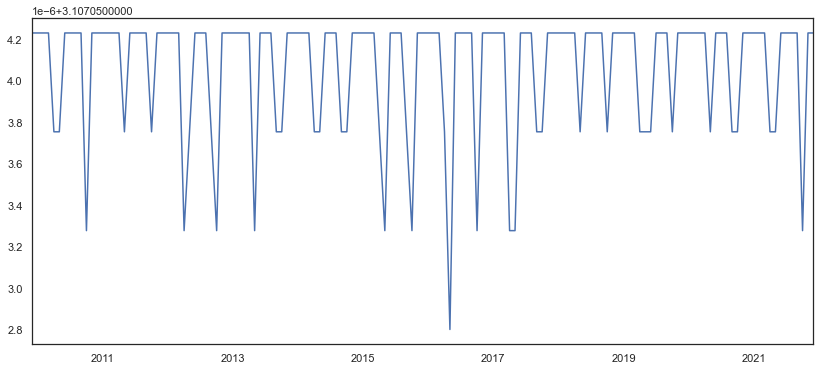

In [398]:
#y_test.plot()
pd.Series(y_hat, index=y_test.index).plot()

In [397]:
pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_hat
})

,Actual,Predicted
0,2722.039,3.107054
1,2278.630,3.107054
2,1901.351,3.107054
3,1350.527,3.107054
4,1377.988,3.107054
...,...,...
140,1456.901,3.107054
141,1315.799,3.107054
142,1644.306,3.107053
143,2032.352,3.107054
